In [2]:
import pandas as pd
import numpy as np

## Pizza+Place+Sales

In [4]:
orders = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv")

In [5]:
order_details = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv")

In [6]:
pizzas = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv")

In [16]:
pizza_types = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv",
    encoding='latin1')

## To join the four CSV files into a single data frame

In [11]:
# merge order_details with orders
df = order_details.merge(orders, on='order_id')

In [12]:
# merge with pizzas
df = df.merge(pizzas, on='pizza_id')

In [17]:
# merge with pizza_types
df = df.merge(pizza_types, on='pizza_type_id')

In [18]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


## To Create Revenue Column

In [20]:
df['revenue'] = df['quantity'] * df['price']

## 1. Total Revenue / Sales

In [21]:
total_revenue = df['revenue'].sum()
print(total_revenue)

817860.0499999999


## 2. Total Quantity Sold

In [22]:
total_quantity_sold = df['quantity'].sum()
print(total_quantity_sold)

49574


## 3. Total Orders

In [23]:
total_orders = df['order_id'].nunique()
print(total_orders)

21350


## 4. Number of Pizza Types Sold

In [24]:
pizza_types_count = df['pizza_type_id'].nunique()
print(pizza_types_count)

32


## 5. Average Price of Pizzas

In [25]:
avg_price_of_pizzas = df['price'].mean()
print(avg_price_of_pizzas)

16.494132044426163


## 6. Peak Hours of Sales

In [26]:
df['order_time'] = pd.to_datetime(df['time'])
df['hour'] = df['order_time'].dt.hour

peak_hours_of_sales = df.groupby('hour')['revenue'].sum().sort_values(ascending=False)
print(peak_hours_of_sales)

C:\Users\HP\AppData\Local\Temp\ipykernel_14812\2988420513.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['time'])


hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: revenue, dtype: float64


## 7. Sales by Day of Week

In [27]:
df['order_date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['order_date'].dt.day_name()

sales_by_day = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)
print(sales_by_day)

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64


## 8. Top 5 Best-Selling Pizzas

In [28]:
top5_best_selling_pizzas = (
    df.groupby('name')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print(top5_best_selling_pizzas)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


## 9. Monthly Sales Trend

In [30]:
df['month'] = df['order_date'].dt.month_name()

monthly_sales = (
    df.groupby('month')['revenue']
    .sum()
    .sort_values(ascending=False)
)

print(monthly_sales)

month
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
February     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: revenue, dtype: float64


Matplotlib is building the font cache; this may take a moment.


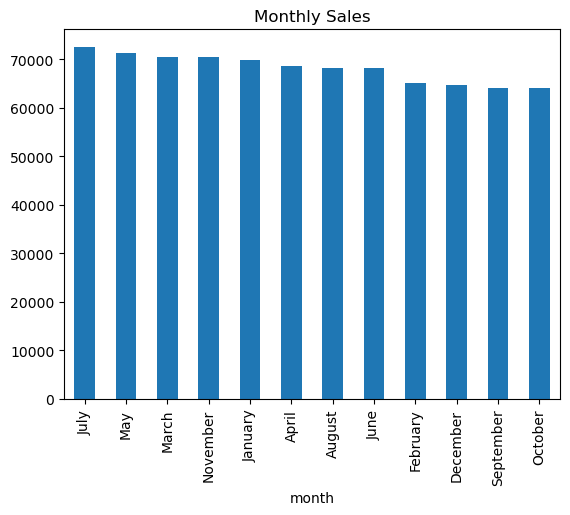

In [31]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.show()

In [ ]:
July has the highest sales

## 10. Pizza Types Not Doing Well

In [32]:
not_doing_well_pizzas = (
    df.groupby('name')['quantity']
    .sum()
    .sort_values()
    .head(5)
)

print(not_doing_well_pizzas)

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


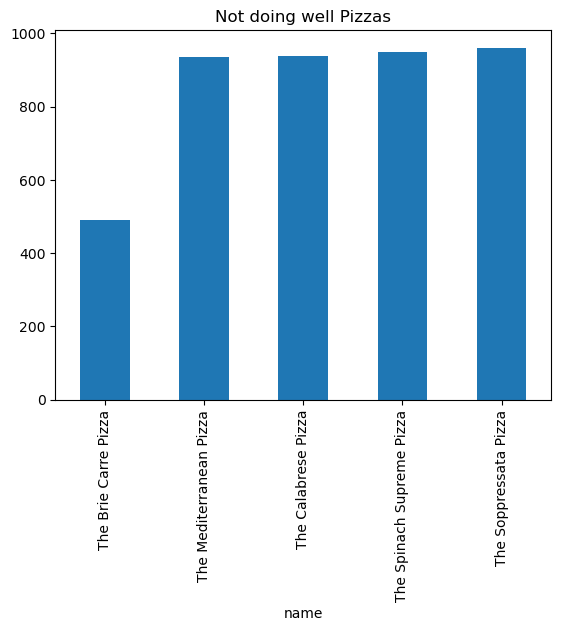

In [33]:
not_doing_well_pizzas.plot(kind='bar')
plt.title('Not doing well Pizzas')
plt.show()